In [1]:
include("../src/Atoms.jl")
include("../src/scfOptions.jl")
include("../src/anderson_mix.jl")
include("../src/kerker_mix.jl")
include("../src/Ham.jl")
include("../src/hartree_pot_bc.jl")
include("../src/pseudocharge.jl")
include("../src/getocc.jl")
include("../src/Integrators.jl")

┌ Info: Precompiling FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1186


time_evolution (generic function with 1 method)

In [2]:
dx = 0.5;
Nunit = 8;   # number of units
Lat = 10;     # size of the lattice
Ls = Nunit*Lat;
# using the default values in Lin's code
YukawaK = 0.0100
n_extra = 50;
epsil0 = 10.0;
T_elec = 50000.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

betamix = 0.4;
mixdim = 10;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

sigma  = ones(Natoms,1)*(3.0);  # metal
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1)*2;          # number of electrons per atom
Z      = nocc;

In [3]:
using PyPlot
function forces(x::Array{Float64,1})
    # input
    #       x: vector with the position of the atoms
    # output
    #       f: forces at the center of the atoms

    R = reshape(x, length(x), 1) # we need to make it a two dimensional array
    # creating an atom structure
    atoms = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);
    # allocating a Hamiltonian
    ham = Ham(Lat, Nunit, n_extra, dx, atoms,YukawaK, epsil0, Tbeta)

    # total number of occupied orbitals
    Nocc = round(Integer, sum(atoms.nocc) / ham.nspin);

    # setting the options for the scf iteration
    KerkerB = 0.5;
    mixOpts = andersonMixOptions(ham.Ns, betamix, mixdim )
    eigOpts = eigOptions(1.e-8, 1000, "eigs");
    scfOpts = scfOptions(1.e-7, 100, eigOpts, mixOpts)

    # initialize the potentials within the Hemiltonian, setting H[\rho_0]
    init_pot!(ham, Nocc)

    # running the scf iteration
    @time VtoterrHist = scf!(ham, scfOpts)
    
    print(VtoterrHist)
    println(ham.ev[Nocc+1]-ham.ev[Nocc])
    plot(1:ham.Ns,ham.rho,"b-")
    println(ham.occ)
    

    if VtoterrHist[end] > scfOpts.SCFtol
        println("convergence not achieved!! ")
    end

    # we compute the forces 
    get_force!(ham)

    return ham.atoms.force[:]
end


┌ Info: Recompiling stale cache file /Users/jeffzzzz/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


forces (generic function with 1 method)

initial conditions
  2.883514 seconds (5.03 M allocations: 301.891 MiB, 3.65% gc time)
[Inf, 0.0940103, 0.00109917, 0.00105738, 0.00127019, 0.00113052, 0.000186397, 0.000172106, 2.14235e-5, 2.07044e-5, 1.98765e-5, 1.58626e-5, 2.61759e-7, 4.2923e-11]0.018715132618643354
[0.838286, 0.836472, 0.836472, 0.831421, 0.831421, 0.824926, 0.824926, 0.821535, 0.724775, 0.71241, 0.71241, 0.6788, 0.6788, 0.628354, 0.628354, 0.574828, 0.545717, 0.478759, 0.478759, 0.39031, 0.39031, 0.29949, 0.29949, 0.215781, 0.214543, 0.144502, 0.144502, 0.0909356, 0.0909356, 0.0538834, 0.0538834, 0.0302366, 0.0302306, 0.0161452, 0.0161452, 0.00823782, 0.00823782, 0.00402684, 0.00402684, 0.00188904, 0.00188904, 0.000851294, 0.000851294, 0.000368745, 0.000368745, 0.000153572, 0.000153572, 6.15043e-5, 6.15043e-5, 2.36885e-5, 2.36885e-5, 8.77458e-6, 8.77458e-6, 3.12593e-6, 3.12593e-6, 1.07103e-6, 1.07103e-6, 3.52934e-7, 3.52934e-7, 1.11856e-7, 1.11856e-7, 3.40956e-8, 3.40956e-8, 9.9957e-9, 9.9957e-9, 2.81841e-9]
runni

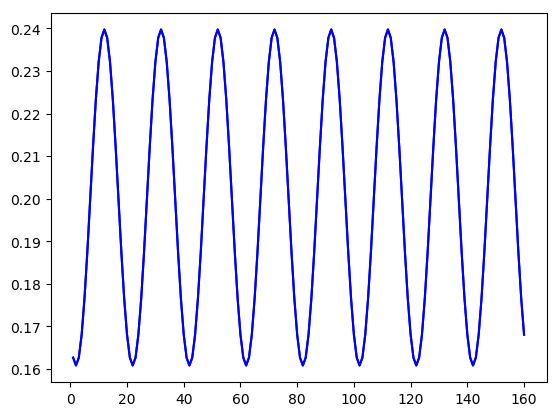

  0.487061 seconds (356.41 k allocations: 73.871 MiB, 3.45% gc time)
[Inf, 0.0940103, 0.00109917, 0.00105738, 0.00127019, 0.00110157, 0.000186392, 0.000176319, 2.29186e-5, 2.22663e-5, 1.93978e-5, 1.2568e-5, 1.37961e-8]0.018715132892500125
[0.838286, 0.836472, 0.836472, 0.831421, 0.831421, 0.824926, 0.824926, 0.821535, 0.724775, 0.71241, 0.71241, 0.6788, 0.6788, 0.628354, 0.628354, 0.574828, 0.545717, 0.478759, 0.478759, 0.39031, 0.39031, 0.29949, 0.29949, 0.215781, 0.214543, 0.144502, 0.144502, 0.0909356, 0.0909356, 0.0538834, 0.0538834, 0.0302366, 0.0302306, 0.0161452, 0.0161452, 0.00823782, 0.00823782, 0.00402684, 0.00402684, 0.00188904, 0.00188904, 0.000851294, 0.000851294, 0.000368745, 0.000368745, 0.000153572, 0.000153572, 6.15043e-5, 6.15043e-5, 2.36885e-5, 2.36885e-5, 8.77458e-6, 8.77458e-6, 3.12593e-6, 3.12593e-6, 1.07103e-6, 1.07103e-6, 3.52934e-7, 3.52934e-7, 1.11856e-7, 1.11856e-7, 3.40956e-8, 3.40956e-8, 9.9957e-9, 9.9957e-9, 2.81841e-9]
loop finished


([5.5 15.5 … 65.5 75.5; 5.5 15.5 … 65.5 75.5], [0.0 0.0 … 0.0 0.0; -7.62886e-14 -8.35274e-14 … 1.12886e-13 5.02346e-14], [3.69225e-12 -5.66875e-12 … 2.6858e-12 -2.69125e-13; -1.895e-11 -1.10367e-11 … 1.98914e-11 1.03161e-11])

In [4]:
# Settign the time evolution

dt = 0.01

x0 = zeros(Natoms); # this is defined as an 2D array

for j = 1:Natoms
  x0[j] = (j-0.5)*Lat*Ndist+dx;
end
#x1 = x0 + dt*[1, -1 ] # with velocity
#x0[1] = x0[1] + 2
x1 = x0

(x, v, vdot) = time_evolution(velocity_verlet, x -> 10*forces(x), dt, 1, x0, x1)

In [5]:
x

2×8 Array{Float64,2}:
 5.5  15.5  25.5  35.5  45.5  55.5  65.5  75.5
 5.5  15.5  25.5  35.5  45.5  55.5  65.5  75.5

In [6]:
v

2×8 Array{Float64,2}:
  0.0           0.0          0.0         …  0.0          0.0        
 -7.62886e-14  -8.35274e-14  1.0551e-13     1.12886e-13  5.02346e-14

initial conditions
  0.460330 seconds (355.32 k allocations: 73.811 MiB, 4.58% gc time)
[Inf, 0.0940103, 0.00109917, 0.00105738, 0.00127019, 0.00110271, 0.000186395, 0.00017588, 2.29094e-5, 2.21957e-5, 1.94803e-5, 1.273e-5, 2.44363e-8]0.01871513213483783
[0.838286, 0.836472, 0.836472, 0.831421, 0.831421, 0.824926, 0.824926, 0.821535, 0.724775, 0.71241, 0.71241, 0.6788, 0.6788, 0.628354, 0.628354, 0.574828, 0.545717, 0.478759, 0.478759, 0.39031, 0.39031, 0.29949, 0.29949, 0.215781, 0.214543, 0.144502, 0.144502, 0.0909356, 0.0909356, 0.0538834, 0.0538834, 0.0302366, 0.0302306, 0.0161452, 0.0161452, 0.00823782, 0.00823782, 0.00402684, 0.00402684, 0.00188904, 0.00188904, 0.000851294, 0.000851294, 0.000368745, 0.000368745, 0.000153572, 0.000153572, 6.15043e-5, 6.15043e-5, 2.36885e-5, 2.36885e-5, 8.77458e-6, 8.77458e-6, 3.12593e-6, 3.12593e-6, 1.07103e-6, 1.07103e-6, 3.52934e-7, 3.52934e-7, 1.11856e-7, 1.11856e-7, 3.40956e-8, 3.40956e-8, 9.9957e-9, 9.9957e-9, 2.81841e-9]
running the loop
  0

  1.090872 seconds (813.19 k allocations: 166.049 MiB, 3.13% gc time)
[5.58506e15, 23.2795, 9.09262, 8.04963, 4.60525, 2.62423, 0.0896575, 0.0113149, 0.0187647, 0.00242877, 0.000516263, 0.000497392, 0.000163392, 2.73839e-5, 0.000417632, 7.17968e-5, 0.000138816, 1.08818e-5, 7.93352e-6, 1.44605e-6, 1.57275e-6, 1.12256e-6, 5.54185e-7, 1.78571e-7, 1.12533e-7, 4.63954e-8]0.01872868706096545
[0.838382, 0.836801, 0.836194, 0.831606, 0.831199, 0.825012, 0.824835, 0.821529, 0.724826, 0.713095, 0.711747, 0.6794, 0.678152, 0.628574, 0.628094, 0.574826, 0.545694, 0.478883, 0.478614, 0.390395, 0.390211, 0.299519, 0.299451, 0.215778, 0.214539, 0.144502, 0.144499, 0.0909357, 0.0909335, 0.0538832, 0.0538825, 0.0302363, 0.0302303, 0.0161451, 0.0161451, 0.00823777, 0.00823776, 0.00402682, 0.00402682, 0.00188903, 0.00188903, 0.00085129, 0.00085129, 0.000368744, 0.000368744, 0.000153572, 0.000153572, 6.15041e-5, 6.15041e-5, 2.36884e-5, 2.36884e-5, 8.77455e-6, 8.77455e-6, 3.12592e-6, 3.12592e-6, 1.07103e-6

  1.030086 seconds (782.96 k allocations: 159.855 MiB, 3.11% gc time)
[4.61252e15, 40.8941, 7.29493, 7.05339, 14.9731, 2.87287, 0.175487, 0.0390732, 0.0590155, 0.00368046, 0.00107383, 0.000703666, 8.80682e-5, 2.65356e-5, 2.82204e-5, 1.72112e-5, 8.66706e-5, 1.43308e-5, 2.89677e-6, 3.16647e-6, 6.85395e-7, 4.20257e-7, 1.77088e-6, 2.538e-7, 9.16413e-8]0.01876918540137215
[0.838711, 0.837099, 0.835989, 0.831749, 0.830956, 0.825105, 0.824732, 0.821511, 0.724981, 0.713787, 0.711117, 0.679947, 0.67746, 0.62876, 0.627793, 0.574821, 0.545625, 0.478987, 0.478446, 0.390464, 0.390098, 0.299539, 0.299402, 0.21577, 0.214529, 0.144498, 0.144492, 0.0909338, 0.0909293, 0.053882, 0.0538806, 0.0302356, 0.0302295, 0.0161447, 0.0161447, 0.00823761, 0.0082376, 0.00402675, 0.00402675, 0.001889, 0.001889, 0.000851279, 0.000851279, 0.00036874, 0.00036874, 0.00015357, 0.00015357, 6.15035e-5, 6.15035e-5, 2.36882e-5, 2.36882e-5, 8.77449e-6, 8.77449e-6, 3.1259e-6, 3.1259e-6, 1.07102e-6, 1.07102e-6, 3.52931e-7, 3.52

  1.584533 seconds (974.22 k allocations: 198.798 MiB, 3.36% gc time)
[4.56475e15, 52.1436, 8.16993, 6.14852, 23.3393, 3.024, 0.258677, 0.0930306, 0.0715534, 0.00445313, 0.00177321, 0.00081777, 9.55218e-5, 7.79395e-5, 0.000355614, 0.000284116, 0.000412102, 5.68993e-5, 2.13784e-5, 6.50613e-6, 7.10275e-6, 6.15775e-6, 1.06217e-6, 8.24055e-7, 2.79829e-7, 1.74008e-7, 1.7944e-7, 4.71274e-7, 3.14642e-7, 1.67194e-7, 7.31971e-8]0.018836130182286692
[0.839325, 0.837293, 0.835849, 0.831857, 0.830715, 0.825212, 0.824611, 0.821478, 0.725243, 0.714467, 0.71053, 0.680441, 0.676733, 0.628916, 0.627447, 0.574811, 0.545511, 0.479071, 0.478256, 0.39052, 0.389969, 0.299549, 0.299343, 0.215757, 0.214512, 0.14449, 0.144481, 0.09093, 0.0909232, 0.0538797, 0.0538777, 0.0302343, 0.0302283, 0.0161441, 0.0161441, 0.00823735, 0.00823734, 0.00402664, 0.00402663, 0.00188896, 0.00188895, 0.00085126, 0.00085126, 0.000368732, 0.000368732, 0.000153567, 0.000153567, 6.15026e-5, 6.15026e-5, 2.36879e-5, 2.36879e-5, 8.7743

  1.595623 seconds (1.01 M allocations: 205.359 MiB, 2.98% gc time)
[3.83069e15, 58.2414, 9.28834, 5.92001, 26.5775, 3.07796, 0.328498, 0.15701, 0.0761659, 0.00499243, 0.00246487, 0.000902239, 0.000116408, 0.000124392, 0.000425232, 0.000344433, 0.000649577, 8.41772e-5, 3.08464e-5, 9.58884e-6, 1.56201e-5, 9.15795e-6, 1.44729e-6, 2.03085e-6, 4.03472e-7, 2.37357e-7, 6.22554e-7, 1.03369e-6, 8.38945e-7, 3.88414e-7, 2.04684e-7, 3.31579e-8]0.01891576425418867
[0.840067, 0.837387, 0.835766, 0.831931, 0.830524, 0.825322, 0.824491, 0.821432, 0.725564, 0.715037, 0.710055, 0.680829, 0.676074, 0.629031, 0.627106, 0.574801, 0.545375, 0.47913, 0.47807, 0.390558, 0.389846, 0.299551, 0.299284, 0.215741, 0.214491, 0.144481, 0.144469, 0.090925, 0.0909163, 0.0538769, 0.0538743, 0.0302328, 0.0302268, 0.0161434, 0.0161434, 0.00823703, 0.00823702, 0.0040265, 0.0040265, 0.0018889, 0.00188889, 0.000851238, 0.000851238, 0.000368724, 0.000368724, 0.000153564, 0.000153564, 6.15014e-5, 6.15014e-5, 2.36875e-5, 2.36

  1.251877 seconds (1.01 M allocations: 205.565 MiB, 2.87% gc time)
[6.01364e15, 62.1259, 10.3851, 6.04477, 27.2634, 3.07621, 0.394784, 0.232062, 0.0800435, 0.00549095, 0.00318111, 0.000979747, 0.000150635, 0.0001624, 0.000480343, 0.000374149, 0.000736353, 9.867e-5, 3.7211e-5, 1.49537e-5, 2.13316e-5, 9.63508e-6, 1.83071e-6, 2.69807e-6, 5.0451e-7, 2.75226e-7, 8.14482e-7, 1.34602e-6, 9.92509e-7, 5.45461e-7, 2.7394e-7, 4.23293e-8]0.01901427581615328
[0.840955, 0.837441, 0.835708, 0.831991, 0.830363, 0.825448, 0.824364, 0.821366, 0.725972, 0.715571, 0.709615, 0.681177, 0.675402, 0.629129, 0.626731, 0.574787, 0.545208, 0.479177, 0.477866, 0.390585, 0.389711, 0.299546, 0.299217, 0.215721, 0.214466, 0.144469, 0.144454, 0.0909186, 0.0909079, 0.0538734, 0.0538702, 0.0302309, 0.0302249, 0.0161426, 0.0161425, 0.00823665, 0.00823663, 0.00402634, 0.00402633, 0.00188883, 0.00188883, 0.00085121, 0.00085121, 0.000368713, 0.000368713, 0.00015356, 0.00015356, 6.15e-5, 6.15e-5, 2.3687e-5, 2.3687e-5, 8.77

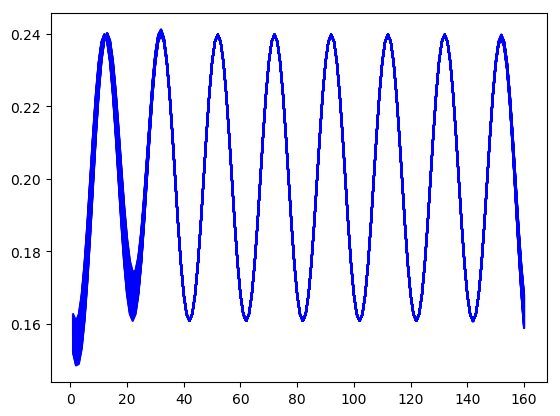

  1.395788 seconds (1.01 M allocations: 205.868 MiB, 3.76% gc time)
[1.86847e15, 62.9521, 10.6791, 6.1188, 27.2199, 3.06859, 0.41301, 0.255326, 0.0810883, 0.00563002, 0.00338669, 0.00100178, 0.00016267, 0.00017281, 0.000501161, 0.000380675, 0.000689045, 0.000102334, 3.94247e-5, 1.65215e-5, 2.26231e-5, 9.62922e-6, 1.92786e-6, 2.84238e-6, 5.26725e-7, 2.85888e-7, 8.58984e-7, 1.39975e-6, 9.5739e-7, 5.94588e-7, 2.89681e-7, 4.46958e-8]0.019045764301220708
[0.84123, 0.837452, 0.835696, 0.832007, 0.830324, 0.825487, 0.824328, 0.821344, 0.726104, 0.715715, 0.709497, 0.68127, 0.675209, 0.629154, 0.626617, 0.574783, 0.545154, 0.479187, 0.477805, 0.390591, 0.389671, 0.299544, 0.299196, 0.215715, 0.214458, 0.144465, 0.144449, 0.0909165, 0.0909053, 0.0538723, 0.0538689, 0.0302303, 0.0302243, 0.0161423, 0.0161423, 0.00823652, 0.0082365, 0.00402628, 0.00402628, 0.00188881, 0.0018888, 0.000851202, 0.000851201, 0.00036871, 0.00036871, 0.000153559, 0.000153559, 6.14996e-5, 6.14996e-5, 2.36869e-5, 2.36869

([5.5 15.5 … 65.5 75.5; 5.51 15.5 … 65.5 75.5; … ; 5.88748 15.5013 … 65.5 75.5012; 5.89728 15.5014 … 65.5 75.5013], [1.0 0.0 … 0.0 0.0; 0.999987 6.35105e-6 … 4.44206e-8 6.33705e-6; … ; 0.98066 0.00986114 … 7.68236e-5 0.00931208; 0.97966 0.0103771 … 8.14687e-5 0.00978516], [8.30981e-12 -3.97076e-12 … -8.05658e-13 -3.97007e-12; -0.00255547 0.00127021 … 8.88413e-6 0.00126741; … ; -0.0986983 0.0509312 … 0.000455233 0.0467512; -0.101178 0.0522551 … 0.000473785 0.0478637])

In [7]:
# Settign the time evolution

dt = 0.01

x0 = zeros(Natoms); # this is defined as an 2D array

for j = 1:Natoms
  x0[j] = (j-0.5)*Lat*Ndist+dx;
end

velocity = zeros(Natoms)
velocity[1] = velocity[1]+1.0
x1 = x0 + dt*velocity # with velocity

(x, v, vdot) = time_evolution(velocity_verlet, x -> 10*forces(x), dt, 40, x0, x1)

In [8]:
x

41×8 Array{Float64,2}:
 5.5      15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.51     15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.52     15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.53     15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.54     15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.54999  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.55999  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.56999  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.57998  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.58997  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.59996  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.60994  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 5.61993  15.5     25.5  35.5  45.5  55.5  65.5  75.5   
 ⋮                                    ⋮                 
 5.78896  15.5005  25.5  35.5  45.5  55.5  65.5  75.5005
 5.79885  15.5006  25.5  35.5  45.5  55.5  65.5  75.5006
 5.80873  15.5006  25.5  35.5  45.5  55.5  65.5  75.5006
 5.81861

In [9]:
v

41×8 Array{Float64,2}:
 1.0       0.0          0.0         0.0          …  0.0         0.0        
 0.999987  6.35105e-6   4.46913e-8  9.57368e-11     4.44206e-8  6.33705e-6 
 0.999949  2.54181e-5   1.79194e-7  2.67631e-10     1.77434e-7  2.53337e-5 
 0.999885  5.72283e-5   4.04378e-7  4.64018e-10     3.98617e-7  5.69609e-5 
 0.999796  0.000101808  7.21231e-7  6.90896e-10     7.07781e-7  0.000101189
 0.999681  0.000159184  1.13092e-6  1.04698e-9   …  1.10492e-6  0.000157987
 0.99954   0.00022938   1.6348e-6   1.55592e-9      1.59005e-6  0.000227324
 0.999374  0.000312421  2.23458e-6  2.08299e-9      2.16325e-6  0.000309169
 0.999182  0.000408332  2.93175e-6  2.73618e-9      2.82516e-6  0.000403489
 0.998965  0.000517134  3.728e-6    3.57777e-9      3.57651e-6  0.000510252
 0.998723  0.000638852  4.62548e-6  4.56983e-9   …  4.41786e-6  0.000629423
 0.998455  0.000773506  5.62648e-6  5.6396e-9       5.35e-6     0.000760968
 0.998161  0.000921117  6.73328e-6  6.8398e-9       6.37398e-6  0